# Predspracovanie dát

## Načítanie knižníc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

## Načítanie dát

In [2]:
df_train = pd.read_csv('data/Train_data.csv')

In [3]:
df_train['class'] = df_train['class'].map({'normal': 0, 'anomaly': 1})

quantitative_columns = ['src_bytes', 'dst_bytes', 'hot', 'count', 'serror_rate', 'rerror_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']

df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


## Výber atribútov na základe korelačnej matice a informačného zisku
 - #### Informačný zisk (kde importance je väčší ako 0.02):
    - **src_bytes**                : 0.7303
    - **dst_bytes**                : 0.0242
    - **hot**                      : 0.0230
    - **dst_host_same_srv_rate**   : 0.0262
    - **service_ecr_i**            : 0.0748
    - **service_http**             : 0.0547
    
 - #### Korelácia voči cieľovému atribútu (kde korelácia je väčšia ako 0.1):
    - **dst_host_srv_serror_rate**    : 0.653759
    - **dst_host_serror_rate**        : 0.651050
    - **flag_S0**                     : 0.650227
    - **serror_rate**                 : 0.649952
    - **srv_serror_rate**             : 0.647817
    - **count**                      : 0.578790
    - **service_private**             : 0.447088
    - **dst_host_count**              : 0.368828
    - **dst_host_srv_rerror_rate**    : 0.256999
    - **rerror_rate**                 : 0.256858
    - **dst_host_rerror_rate**        : 0.256312
    - **srv_rerror_rate**             : 0.256152
    - **dst_host_diff_srv_rate**      : 0.238170
    - **diff_srv_rate**               : 0.193528
    - **flag_REJ**                    : 0.187674
    - **service_eco_i**               : 0.167375
    - **service_ecr_i**               : 0.149382
    - **flag_RSTR**                   : 0.135799


In [4]:
attributes = ['src_bytes', 'dst_bytes', 'hot', 'dst_host_same_srv_rate', 'service_ecr_i', 'service_http',
              'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'flag_S0', 'serror_rate', 'srv_serror_rate', 'count',
              'service_private', 'dst_host_count', 'dst_host_srv_rerror_rate', 'rerror_rate', 'dst_host_rerror_rate',
              'srv_rerror_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate', 'flag_REJ', 'service_eco_i',
              'service_ecr_i', 'flag_RSTR', 'class']

categorical = df_train.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded = encoder.fit_transform(df_train[categorical])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical))


df_train.drop(columns=categorical, inplace=True)
df_train = pd.concat([df_train.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

for col in df_train.columns:
    if col not in attributes:
        df_train = df_train.drop(col, axis=1)

df_train

,src_bytes,dst_bytes,hot,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_count,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_eco_i,service_ecr_i,service_http,service_private,flag_REJ,flag_RSTR,flag_S0
0,491,0,0,2,0.0,0.0,0.0,0.0,0.00,150,...,0.05,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,146,0,0,13,0.0,0.0,0.0,0.0,0.15,255,...,0.00,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,123,1.0,1.0,0.0,0.0,0.07,255,...,0.00,0.00,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,232,8153,0,5,0.2,0.2,0.0,0.0,0.00,30,...,0.00,0.01,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,199,420,0,30,0.0,0.0,0.0,0.0,0.00,255,...,0.00,0.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,100,0.0,0.0,1.0,1.0,0.07,255,...,1.00,1.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25188,334,0,0,1,0.0,0.0,0.0,0.0,0.00,1,...,0.00,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25189,0,0,0,105,0.0,0.0,1.0,1.0,0.07,255,...,1.00,1.00,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25190,0,0,0,129,1.0,1.0,0.0,0.0,0.06,255,...,0.00,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Korelačná matica

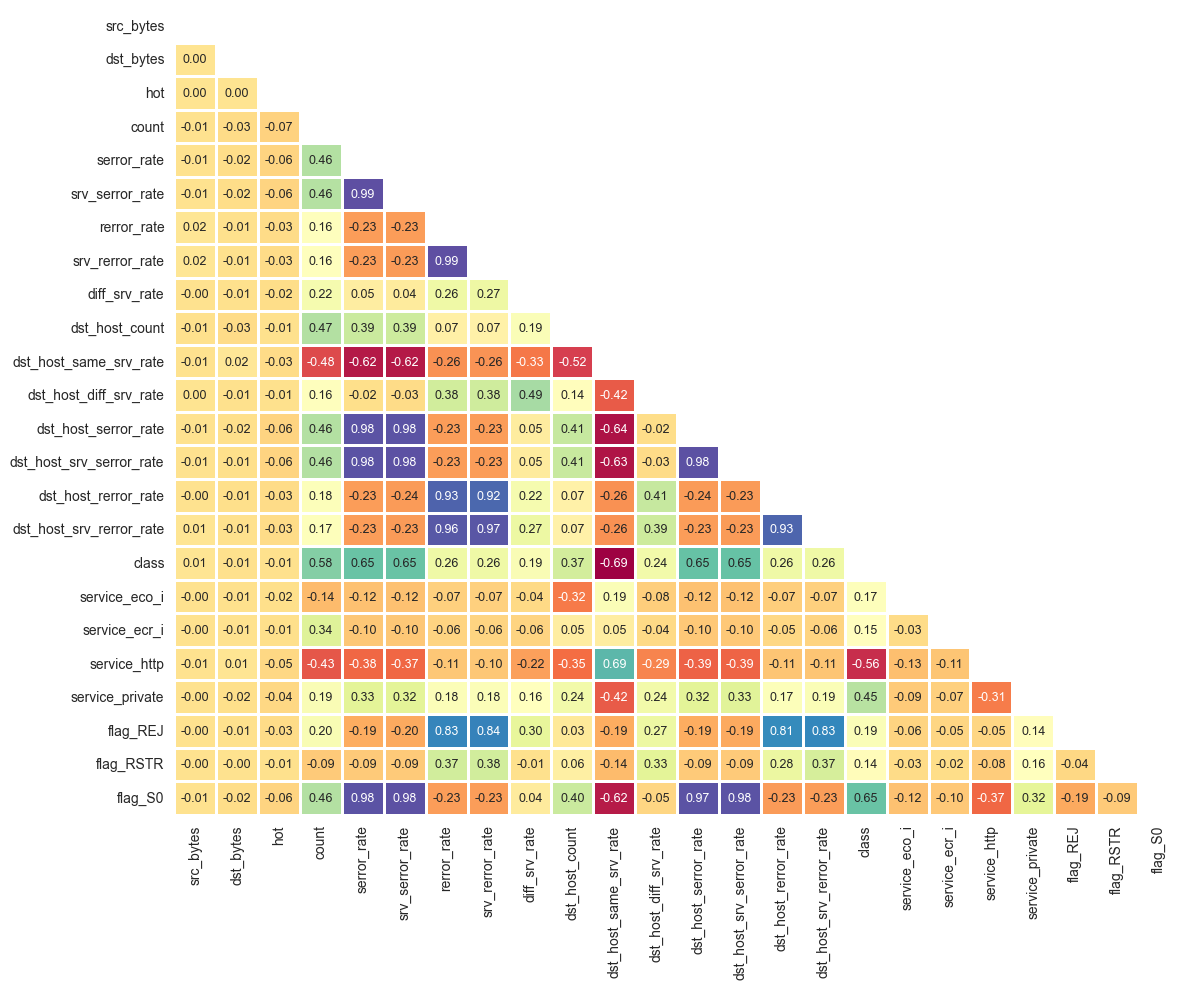

In [5]:
plt.figure(figsize = (12,10))
sns.set_style('white')
sns.heatmap(df_train.corr(), mask=np.triu(np.ones_like(df_train.corr(), dtype=bool)), linewidths=2, annot=True, fmt=".2f", annot_kws={"size": 9}, cbar=False, cmap='Spectral')
plt.tight_layout()
plt.savefig('images/correlation_matrix_before_high_correlated_delete.png', dpi=300)
plt.show()

In [6]:
df_train.drop(columns=['flag_S0', 'flag_REJ', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate'], inplace=True)

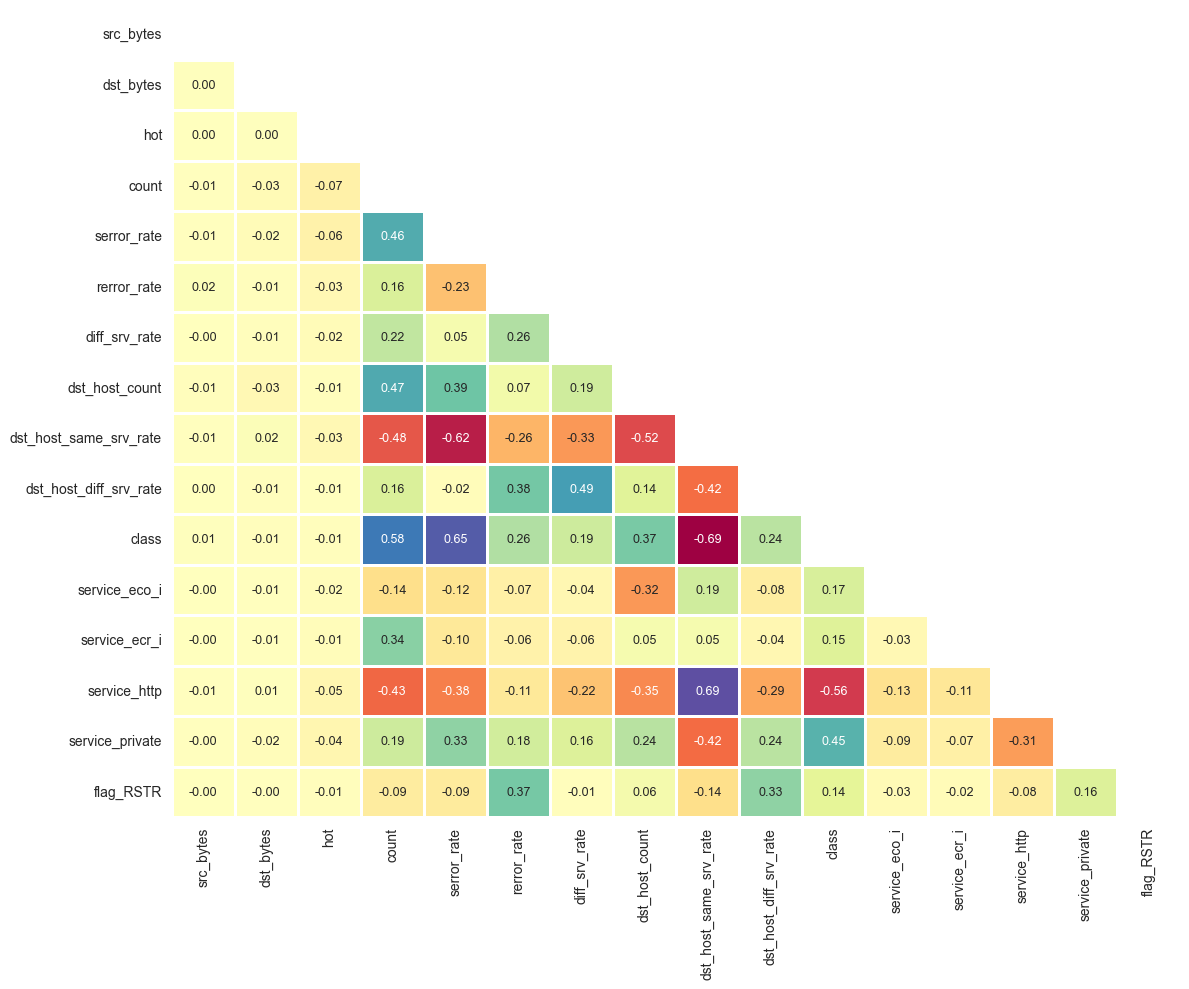

In [7]:
plt.figure(figsize = (12,10))
sns.set_style('white')
sns.heatmap(df_train.corr(), mask=np.triu(np.ones_like(df_train.corr(), dtype=bool)), linewidths=2, annot=True, fmt=".2f", annot_kws={"size": 9}, cbar=False, cmap='Spectral')
plt.tight_layout()
plt.savefig('images/correlation_matrix_after_high_correlated_delete.png', dpi=300)
plt.show()

## Distribúcia kvantitatívnych atribútov

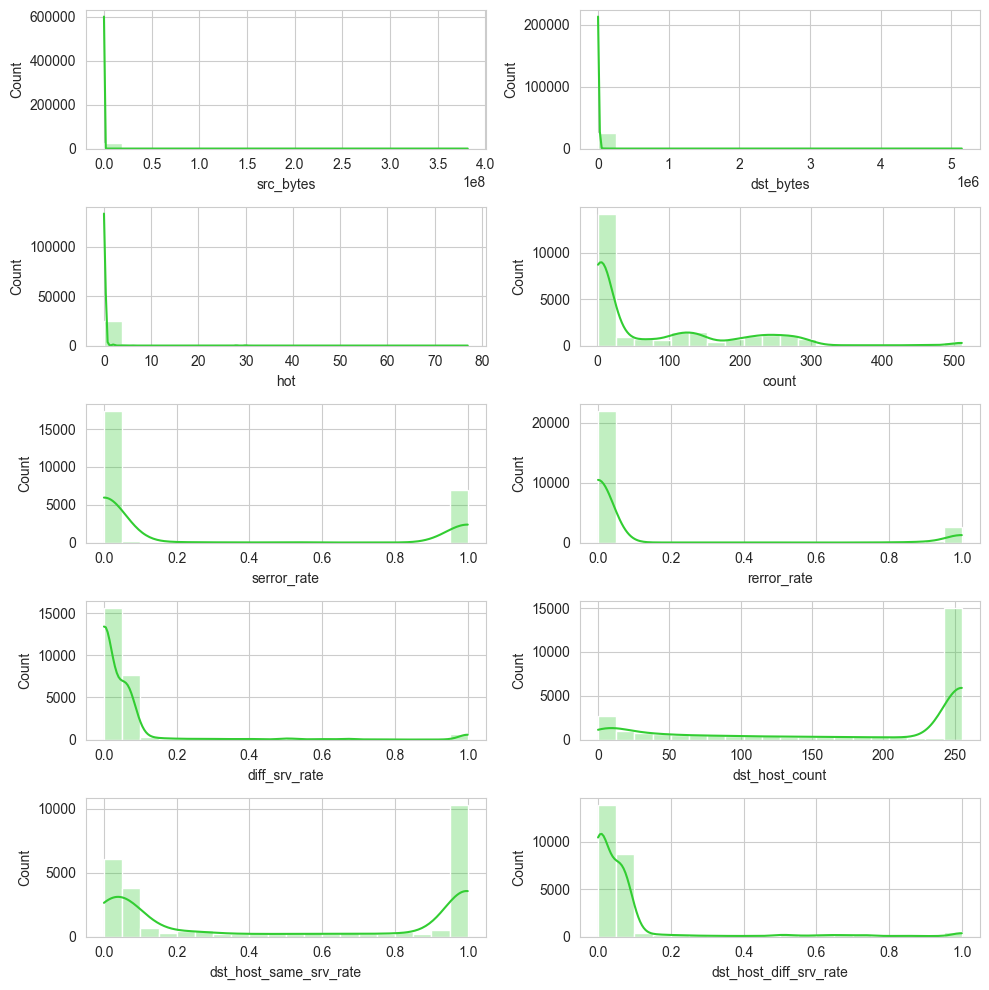

In [8]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    if col == 'class':
        continue
    sns.histplot(df_train[col], kde=True, color='#32CD32', bins=20, element='bars', ax=ax, alpha=0.3)


fig.tight_layout()
plt.savefig('images/distribution_of_quantitative_attributes_before.png', dpi=300)
plt.show()

## Boxplot kvantitatívnych atribútov

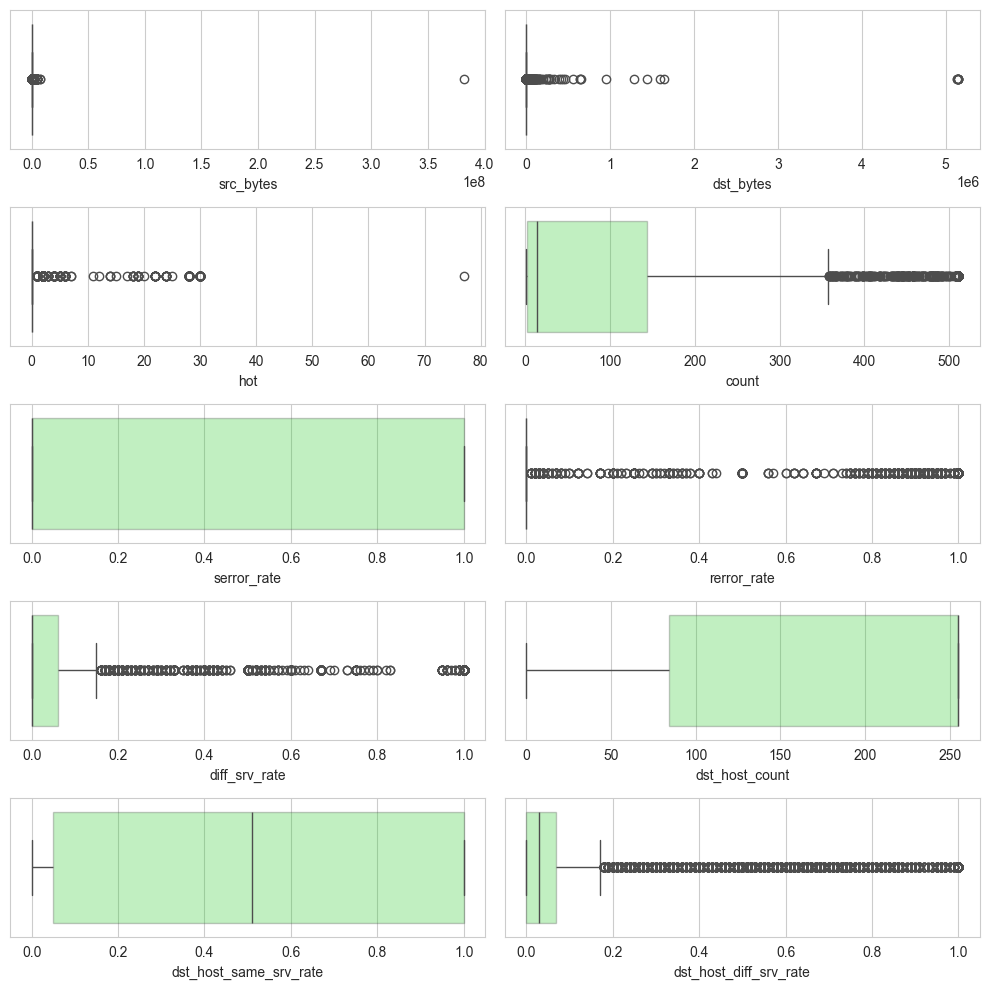

In [9]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    if col == 'class':
        continue
    sns.boxplot(data=df_train, x=col, ax=ax, color='#32CD32', boxprops=dict(facecolor='#32CD32', alpha=0.3))

fig.tight_layout()
plt.savefig('images/boxplot_of_quantitative_attributes_before.png', dpi=300)
plt.show()

## Zistenie šikmosti distribúcie kvantitatívnych atribútov

In [10]:
skewness = df_train.skew()
skewness

src_bytes                 157.558542
dst_bytes                  54.777576
hot                        13.589537
count                       1.503733
serror_rate                 0.952647
rerror_rate                 2.346358
diff_srv_rate               4.417749
dst_host_count             -0.843161
dst_host_same_srv_rate     -0.004024
dst_host_diff_srv_rate      3.616185
class                       0.135760
service_eco_i               4.975375
service_ecr_i               6.174603
service_http                0.783250
service_private             1.731780
flag_RSTR                   6.907528
dtype: float64

## Aplikovanie logaritmickej transformácie na atribúty s veľkou šikmosťou

In [11]:
skewed_cols = ['src_bytes', 'dst_bytes', 'hot', 'count', 'diff_srv_rate', 'dst_host_diff_srv_rate']
df_train[skewed_cols] = df_train[skewed_cols].apply(lambda x: np.log1p(x))

skewness = df_train[skewed_cols].skew()
skewness

src_bytes                 0.313217
dst_bytes                 0.493787
hot                       9.447424
count                     0.118500
diff_srv_rate             4.055393
dst_host_diff_srv_rate    3.290085
dtype: float64

## Zobrazenie distribúcie po logaritmickej transformácii

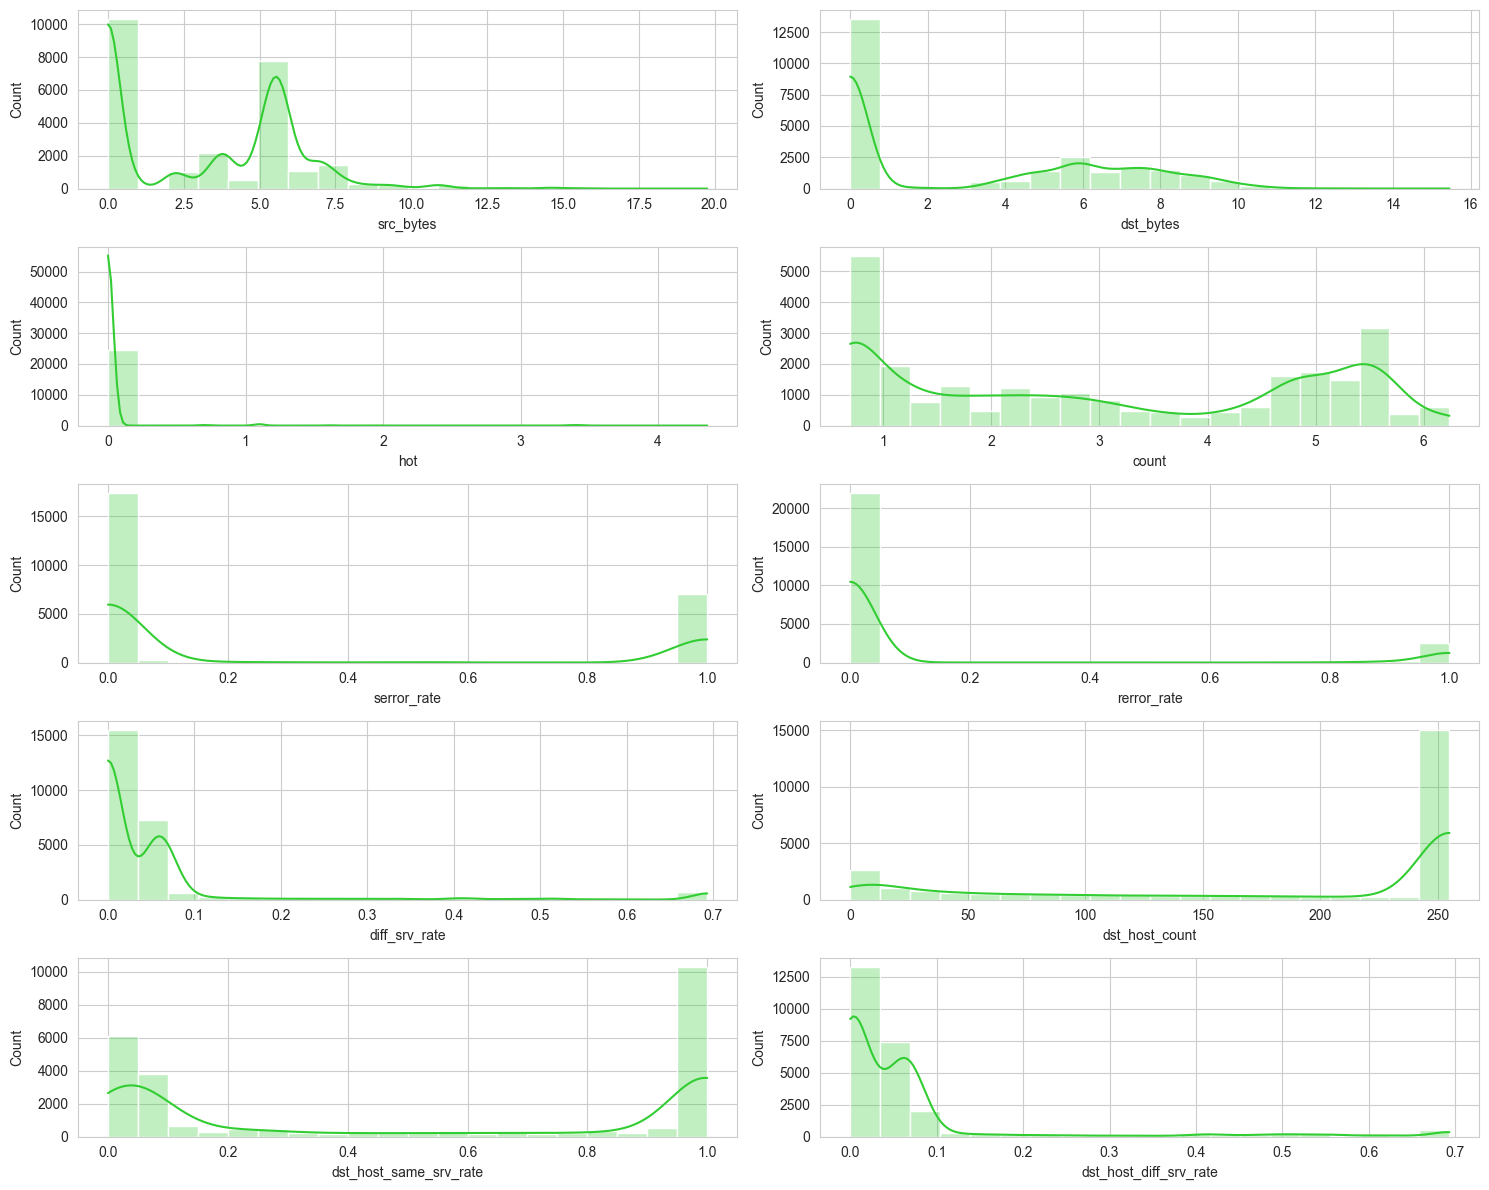

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    if col == 'class':
        continue
    sns.histplot(df_train[col], kde=True, color='#32CD32', bins=20, element='bars', ax=ax, alpha=0.3)


fig.tight_layout()
plt.savefig('images/distribution_of_quantitative_attributes_after_skewness.png', dpi=300)
plt.show()

## Boxplot kvantitatívnych atribútov pre zobrazenie outlierov

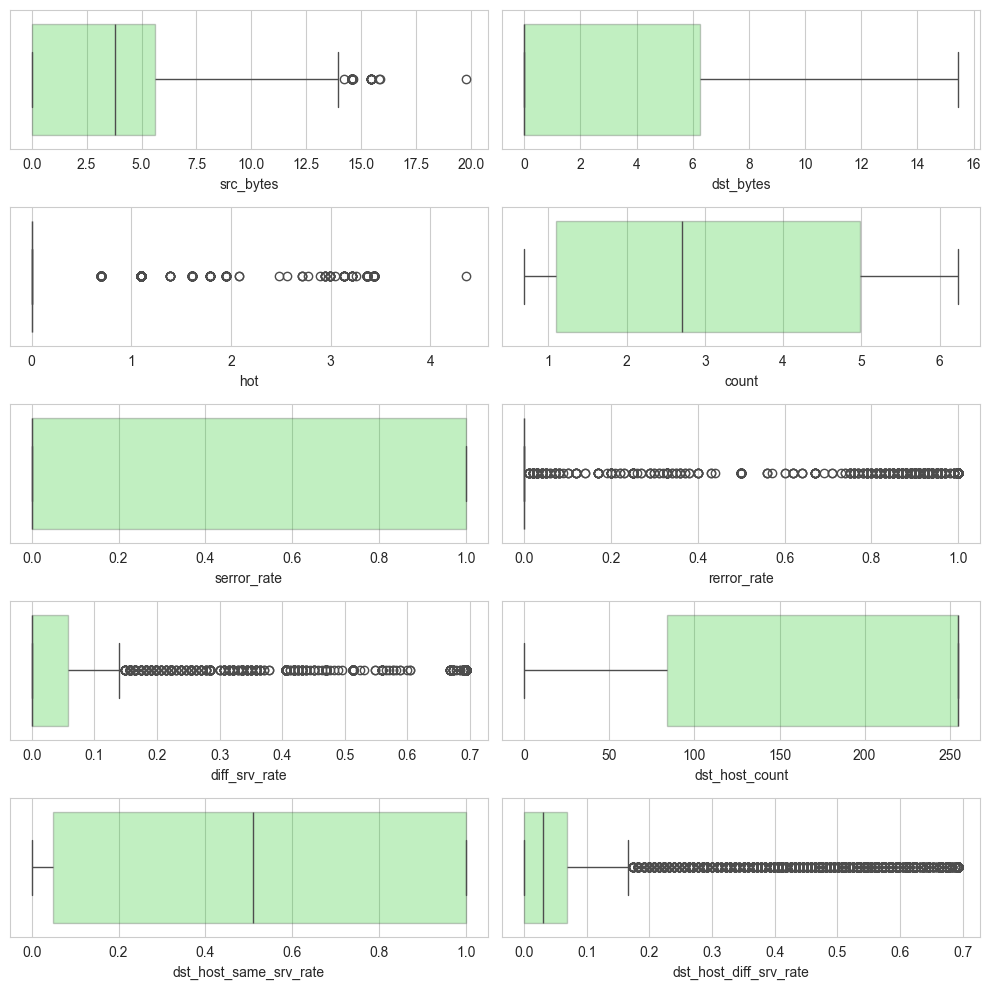

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    if col == 'class':
        continue
    sns.boxplot(data=df_train, x=col, ax=ax, color='#32CD32', boxprops=dict(facecolor='#32CD32', alpha=0.3))

fig.tight_layout()
plt.show()

## Odstránenie outlierov pomocou IQR

In [14]:
for col in quantitative_columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:
        print(f'zero IQR')
        continue

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    upper_mask = df_train[col] >= upper
    lower_mask = df_train[col] <= lower
    print(f'{col}', 'Upper:', upper, 'Lower:', lower)

    df_train = df_train[~(upper_mask | lower_mask)]

src_bytes Upper: 14.086974007923123 Lower: -8.452184404753874
dst_bytes Upper: 15.71964640040446 Lower: -9.431787840242677
zero IQR
count Upper: 10.793915923049271 Lower: -4.718569891960587
serror_rate Upper: 2.5 Lower: -1.5
zero IQR
diff_srv_rate Upper: 0.14567227030993943 Lower: -0.08740336218596366
dst_host_count Upper: 523.5 Lower: -192.5
dst_host_same_srv_rate Upper: 2.425 Lower: -1.3749999999999998
dst_host_diff_srv_rate Upper: 0.16914662118453702 Lower: -0.10148797271072221


## Boxplot kvantitatívnych atribútov po odstránení outlierov

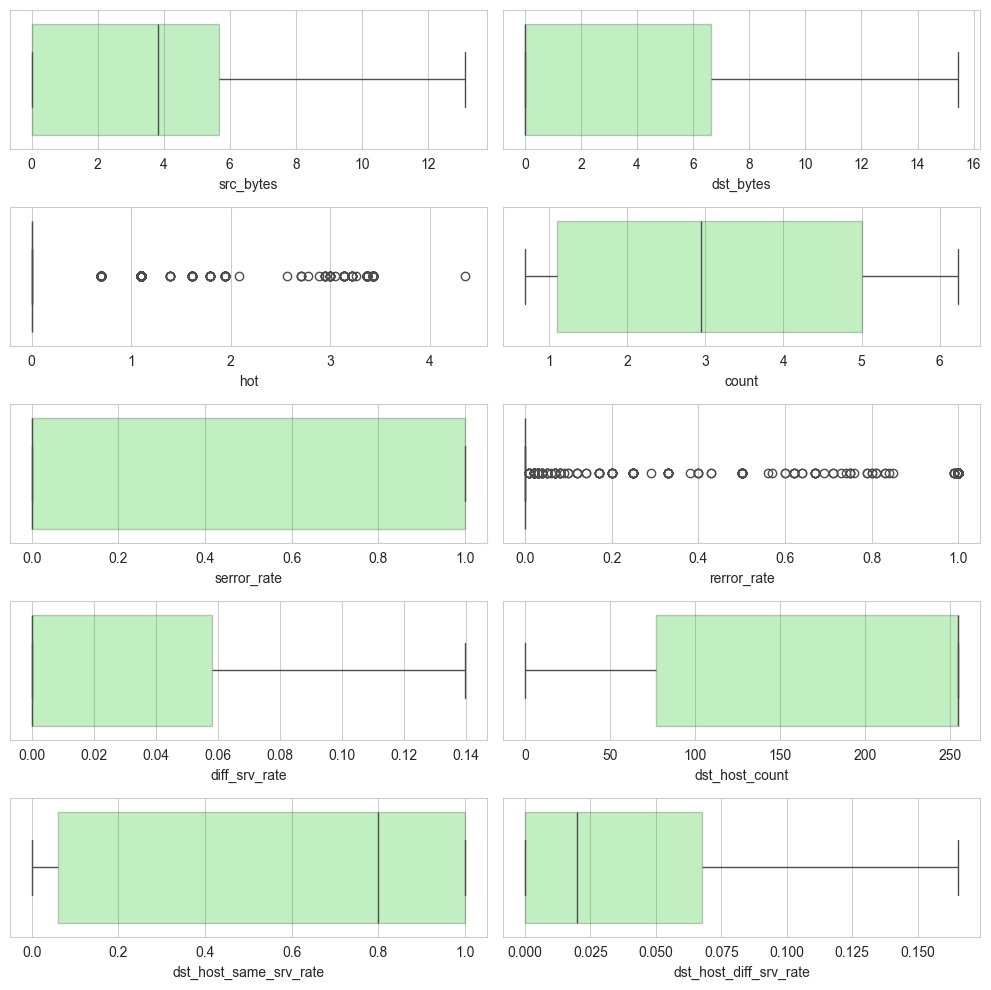

In [15]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

for col, ax in zip(quantitative_columns, axes):
    sns.boxplot(data=df_train, x=col, ax=ax, color='#32CD32', boxprops=dict(facecolor='#32CD32', alpha=0.3))

fig.tight_layout()
plt.savefig('images/boxplot_of_quantitative_attributes_after.png', dpi=300)
plt.show()

## Pretypovanie kvantitatívnych atribútov na float16 a int16

In [16]:
for col in df_train:
    if df_train[col].dtype == 'float64':
        df_train[col] = df_train[col].astype('float16')
    elif df_train[col].dtype == 'int64':
        df_train[col] = df_train[col].astype('int16')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22323 entries, 0 to 25191
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_bytes               22323 non-null  float16
 1   dst_bytes               22323 non-null  float16
 2   hot                     22323 non-null  float16
 3   count                   22323 non-null  float16
 4   serror_rate             22323 non-null  float16
 5   rerror_rate             22323 non-null  float16
 6   diff_srv_rate           22323 non-null  float16
 7   dst_host_count          22323 non-null  int16  
 8   dst_host_same_srv_rate  22323 non-null  float16
 9   dst_host_diff_srv_rate  22323 non-null  float16
 10  class                   22323 non-null  int16  
 11  service_eco_i           22323 non-null  float16
 12  service_ecr_i           22323 non-null  float16
 13  service_http            22323 non-null  float16
 14  service_private         22323 non-null  flo

## Uloženie predspracovaných dát do pickle súboru

In [18]:
df_train.to_pickle('data/Train_data_preprocessed.pkl')